In [1]:
import matplotlib.pyplot as plt
import requests
import yfinance as yf
import pandas as pd
import random
import os

In [2]:
# Excel from here: https://www.kauppalehti.fi/porssi/kurssit/FNFI
data = pd.read_csv('data\Osakelista_FNFI.csv', header=0, delimiter=';')

In [3]:
data

,Osake,Hinta,Muutos,Osto,Myynti,Vaihto,Ylin,Alin,Markkina-arvo,Päivitetty
0,Aallon Group,"9,82","0,20408163265305687","9,8","9,94","9972,92","9,82","9,8","38452753,38",13.11.2023
1,Admicom,"39,55","-4,813477737665464","39,55","39,8","228594,6","41,55",39,"197314356,75",13.11.2023
2,Administer,"2,73",0,"2,74","2,8","4529,07","2,73","2,73","39119300,22",13.11.2023
3,Aiforia Technologies,"3,44","1,4749262536873105","3,39","3,44","3670,76","3,46","3,44","89252919,03999999",13.11.2023
4,Alexandria Group Oyj,6,"2,3890784982935096","5,88","6,02",18234,6,"5,88",62522220,13.11.2023
5,Asuntosalkku,NaN,NaN,75,76,NaN,NaN,NaN,74980992,13.11.2023
6,BBS-Bioactive Bone Substitutes,"0,57","-2,061855670103095","0,56","0,57","9211,542","0,598","0,56","8332742,789999999",13.11.2023
7,Betolar,"1,005","-2,898550724637684","0,978",1,"6467,394","1,05","0,978","19704916,409999996",13.11.2023
8,Bioretec,"2,34","0,8620689655172422","2,3","2,34","5163,45","2,36","2,3","45716247,72",13.11.2023
9,Detection Technology,14,"4,477611940298504",14,"14,1","116968,35","14,25","13,6",205183020,13.11.2023


In [4]:
company_names = data['Osake'].tolist()

In [5]:
company_names

['Aallon Group',
 'Admicom',
 'Administer',
 'Aiforia Technologies',
 'Alexandria Group Oyj',
 'Asuntosalkku',
 'BBS-Bioactive Bone Substitutes',
 'Betolar',
 'Bioretec',
 'Detection Technology',
 'Digital Workforce',
 'Duell',
 'Eagle Filters Group',
 'EcoUp',
 'Efecte',
 'Faron Pharmaceuticals',
 'Fifax',
 'Fodelia',
 'Fondia',
 'Heeros',
 'Herantis Pharma',
 'Inderes',
 'Kempower',
 'Lamor',
 'LapWall',
 'LeadDesk',
 'Lemonsoft',
 'Loihde',
 'Meriaura Group',
 'Merus Power',
 'Modulight',
 'Nanoform Finland',
 'Netum',
 'Nexstim',
 'Nightingale Health',
 'Norrhydro Group',
 'NYAB',
 'Pallas Air',
 'Partnera',
 'Piippo',
 'Pohjanmaan Arvo Sijoitusosuuskunta',
 'Rush Factory',
 'Solwers',
 'Spinnova',
 'Springvest',
 'Tamtron Group',
 'Titanium',
 'Toivo Group',
 'Viafin Service',
 'Vincit',
 'Witted Megacorp']

In [6]:
tickers = []

# After realizing scraping Nasdaq.com NOR arvopaperi was not possible (at least easily) had to come up with a different solution
# https://stackoverflow.com/questions/38967533/retrieve-company-name-with-ticker-symbol-input-yahoo-or-google-api
def get_ticker(company_name):
    url = "https://query2.finance.yahoo.com/v1/finance/search"
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    params = {"q": company_name, "quotes_count": 1, "country": "Finland"}

    res = requests.get(url=url, params=params, headers={'User-Agent': user_agent})
    data = res.json()

    # Check if 'quotes' key exists and is not empty
    if 'quotes' in data and data['quotes']:
        company_code = data['quotes'][0]['symbol']
        return company_code
    else:
        return None

In [7]:
for company in company_names:
    tickers.append(get_ticker(company))

In [8]:
tickers

['AALLON.HE',
 'ADMCM.HE',
 '140910.KS',
 'AIFORIA.HE',
 'ALEX.HE',
 'ASUNTO.HE',
 'BONEH.HE',
 'BETOLAR.HE',
 'BRETEC.HE',
 'DETEC.HE',
 'DQ4.MU',
 'DUELL.HE',
 'EAGLE.HE',
 'ECOUP.HE',
 'EFECTE.HE',
 'FARON.HE',
 'FIFAX',
 'FODELIA.HE',
 'FONDIA.HE',
 'HEEROS.HE',
 'HRTIS.HE',
 'INDERES.HE',
 'KEMPOWR.HE',
 'LAMOR.HE',
 'LAPWALL.HE',
 'LEADD.HE',
 'LEMON.HE',
 'LOIHDE.HE',
 'MERIS.ST',
 'MERUS.HE',
 'MODU.HE',
 'NANOFH.HE',
 'NETUM.HE',
 'NXTMH.HE',
 'HEALTH.HE',
 'NORRH.HE',
 'NYAB.HE',
 'PALLAS.HE',
 'PARTNE1.HE',
 'PIIPPO.HE',
 'ARVOSK.HE',
 'RUSH.HE',
 '0ST.F',
 'SPINN.HE',
 'SPRING.HE',
 'TAMTRON.HE',
 'TTNM.TO',
 'TOIVO.HE',
 'VIAFIN.HE',
 'VINCIT.HE',
 'WITTED.HE']

In [9]:
none_indices = []
none_company_names = []

# Iterate through tickers and collect None indices
for index, ticker in enumerate(tickers):
    if ticker is None:
        none_indices.append(index)

# Retrieve corresponding company names using None indices
for none_index in none_indices:
    if none_index < len(company_names):
        none_company_names.append(company_names[none_index])

# Print None indices and corresponding company names
print("None indices:", none_indices)
print("Corresponding company names:", none_company_names)

None indices: []
Corresponding company names: []


In [10]:
filtered_tickers = [ticker for ticker in tickers if ticker and '.' in ticker and not ticker.endswith('.HE')]

print("Filtered tickers:", filtered_tickers)

Filtered tickers: ['140910.KS', 'DQ4.MU', 'MERIS.ST', '0ST.F', 'TTNM.TO']


In [11]:
filtered_indeces = []

for filtered_ticker in filtered_tickers:
    index = tickers.index(filtered_ticker)
    filtered_indeces.append(index)
    company_name = company_names[index]

    print(f"Company Name: {company_name}, Ticker: {filtered_ticker}, Index: {index}")

Company Name: Administer, Ticker: 140910.KS, Index: 2
Company Name: Digital Workforce, Ticker: DQ4.MU, Index: 10
Company Name: Meriaura Group, Ticker: MERIS.ST, Index: 28
Company Name: Solwers, Ticker: 0ST.F, Index: 42
Company Name: Titanium, Ticker: TTNM.TO, Index: 46


In [12]:
ticker_mapping = {
    'administer': 'ADMIN.HE',
    'digital_workforce': 'DWF.HE',
    'meriaura_group': 'MERIH.HE',
    'solwers': 'SOLWERS.HE',
    'titanium': 'TITAN.HE'
}

In [13]:
for index, ticker in zip(filtered_indeces, ticker_mapping.values()):
    tickers[index] = ticker

In [14]:
tickers

['AALLON.HE',
 'ADMCM.HE',
 'ADMIN.HE',
 'AIFORIA.HE',
 'ALEX.HE',
 'ASUNTO.HE',
 'BONEH.HE',
 'BETOLAR.HE',
 'BRETEC.HE',
 'DETEC.HE',
 'DWF.HE',
 'DUELL.HE',
 'EAGLE.HE',
 'ECOUP.HE',
 'EFECTE.HE',
 'FARON.HE',
 'FIFAX',
 'FODELIA.HE',
 'FONDIA.HE',
 'HEEROS.HE',
 'HRTIS.HE',
 'INDERES.HE',
 'KEMPOWR.HE',
 'LAMOR.HE',
 'LAPWALL.HE',
 'LEADD.HE',
 'LEMON.HE',
 'LOIHDE.HE',
 'MERIH.HE',
 'MERUS.HE',
 'MODU.HE',
 'NANOFH.HE',
 'NETUM.HE',
 'NXTMH.HE',
 'HEALTH.HE',
 'NORRH.HE',
 'NYAB.HE',
 'PALLAS.HE',
 'PARTNE1.HE',
 'PIIPPO.HE',
 'ARVOSK.HE',
 'RUSH.HE',
 'SOLWERS.HE',
 'SPINN.HE',
 'SPRING.HE',
 'TAMTRON.HE',
 'TITAN.HE',
 'TOIVO.HE',
 'VIAFIN.HE',
 'VINCIT.HE',
 'WITTED.HE']

In [15]:
filtered_tickers = [ticker for ticker in tickers if ticker and '.' in ticker and not ticker.endswith('.HE')]

print("Filtered tickers:", filtered_tickers)

none_indices = []
none_company_names = []

# Iterate through tickers and collect None indices
for index, ticker in enumerate(tickers):
    if ticker is None:
        none_indices.append(index)

# Retrieve corresponding company names using None indices
for none_index in none_indices:
    if none_index < len(company_names):
        none_company_names.append(company_names[none_index])

# Print None indices and corresponding company names
print("None indices:", none_indices)
print("Corresponding company names:", none_company_names)

Filtered tickers: []
None indices: []
Corresponding company names: []


In [16]:
random_tickers = random.sample(tickers, 3)

for ticker in random_tickers:
    # Construct the Ticker object
    stock = yf.Ticker(ticker)

    # Download historical data
    history = stock.history(period="max")

    # Print the ticker and its historical data
    print(f"{ticker} Historical Data:")
    print(history)
    print("\n" + "=" * 50 + "\n")

LAMOR.HE Historical Data:
                           Open   High     Low  Close   Volume  Dividends  \
Date                                                                        
2021-12-08 00:00:00+02:00  5.88  5.883  4.8300   4.83  1593591        0.0   
2021-12-09 00:00:00+02:00  5.88  5.883  4.6105   4.83  2238373        0.0   
2021-12-10 00:00:00+02:00  4.83  4.835  4.6900   4.83   109780        0.0   
2021-12-13 00:00:00+02:00  4.84  4.840  4.7300   4.76    72043        0.0   
2021-12-14 00:00:00+02:00  4.76  4.790  4.5500   4.57    85574        0.0   
...                         ...    ...     ...    ...      ...        ...   
2023-11-07 00:00:00+02:00  2.55  2.690  2.5500   2.67      798        0.0   
2023-11-08 00:00:00+02:00  2.69  2.770  2.5600   2.65     6697        0.0   
2023-11-09 00:00:00+02:00  2.65  2.650  2.6000   2.65     1761        0.0   
2023-11-10 00:00:00+02:00  2.71  2.710  2.6000   2.70      185        0.0   
2023-11-13 00:00:00+02:00  2.70  2.750  2.6000   2

In [17]:
result_folder = 'result_fnfi'

for ticker in tickers:
    stock = yf.Ticker(ticker)
    history = stock.history(period="max")

    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    # Save the history as a .txt file
    file_path = os.path.join(result_folder, f"{ticker}.txt")
    history.to_csv(file_path, sep=',')  # Save as comma-separated values
    print(f"Saved history for {ticker} to {file_path}")

Saved history for AALLON.HE to result_fnfi\AALLON.HE.txt
Saved history for ADMCM.HE to result_fnfi\ADMCM.HE.txt
Saved history for ADMIN.HE to result_fnfi\ADMIN.HE.txt
Saved history for AIFORIA.HE to result_fnfi\AIFORIA.HE.txt
Saved history for ALEX.HE to result_fnfi\ALEX.HE.txt
Saved history for ASUNTO.HE to result_fnfi\ASUNTO.HE.txt
Saved history for BONEH.HE to result_fnfi\BONEH.HE.txt
Saved history for BETOLAR.HE to result_fnfi\BETOLAR.HE.txt
Saved history for BRETEC.HE to result_fnfi\BRETEC.HE.txt
Saved history for DETEC.HE to result_fnfi\DETEC.HE.txt
Saved history for DWF.HE to result_fnfi\DWF.HE.txt
Saved history for DUELL.HE to result_fnfi\DUELL.HE.txt
Saved history for EAGLE.HE to result_fnfi\EAGLE.HE.txt
Saved history for ECOUP.HE to result_fnfi\ECOUP.HE.txt
Saved history for EFECTE.HE to result_fnfi\EFECTE.HE.txt
Saved history for FARON.HE to result_fnfi\FARON.HE.txt
Saved history for FIFAX to result_fnfi\FIFAX.txt
Saved history for FODELIA.HE to result_fnfi\FODELIA.HE.txt
Sa

In [18]:
# CHeck for empty files
for file_name in os.listdir(result_folder):
    file_path = os.path.join(result_folder, file_name)

    # Check if the file is not empty
    if os.path.getsize(file_path) == 0:
        print(f"Warning: File {file_name} is empty.")

No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files
No empty files


In [19]:
files = os.listdir(result_folder)
df = pd.DataFrame()

if files:
    random_file = random.choice(files)
    file_path = os.path.join(result_folder, random_file)
    print(file_path)
    df = pd.read_csv(file_path)

result_fnfi\NXTMH.HE.txt


In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-11-14 00:00:00+02:00,630.008118,634.891907,600.705383,605.589172,40,0.0,0.0
1,2014-11-17 00:00:00+02:00,605.589172,610.472961,595.821594,605.589172,20,0.0,0.0
2,2014-11-18 00:00:00+02:00,605.589172,605.589172,605.589172,605.589172,0,0.0,0.0
3,2014-11-19 00:00:00+02:00,598.751892,605.589172,585.077271,585.077271,127,0.0,0.0
4,2014-11-20 00:00:00+02:00,586.054016,599.728638,586.054016,595.821594,10,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2262 non-null   object 
 1   Open          2262 non-null   float64
 2   High          2262 non-null   float64
 3   Low           2262 non-null   float64
 4   Close         2262 non-null   float64
 5   Volume        2262 non-null   int64  
 6   Dividends     2262 non-null   float64
 7   Stock Splits  2262 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 141.5+ KB


In [22]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.0,2262.000000
mean,95.275023,96.270793,93.912346,94.938062,8793.148541,0.0,0.000019
std,198.134176,199.604153,196.414556,197.857929,18177.285096,0.0,0.000732
min,0.591474,0.784689,0.421918,0.670337,0.000000,0.0,0.000000
25%,3.800000,3.900000,3.650000,3.781250,365.250000,0.0,0.000000
50%,5.286920,5.425000,5.140000,5.280000,2155.500000,0.0,0.000000
75%,26.372431,27.031743,24.907295,26.108707,9376.000000,0.0,0.000000
max,736.474548,752.102661,727.683777,731.590820,232006.000000,0.0,0.033333


In [23]:
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


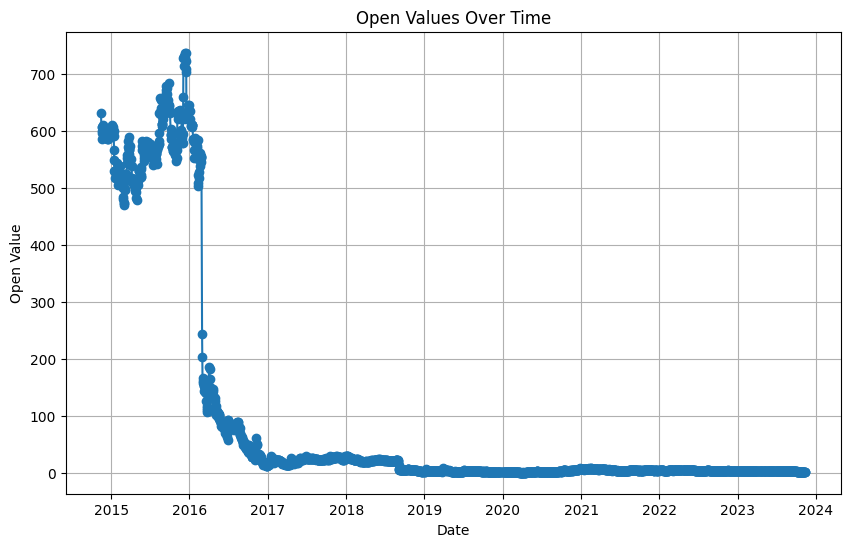

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], marker='o', linestyle='-')
plt.title('Open Values Over Time')
plt.xlabel('Date')
plt.ylabel('Open Value')
plt.grid(True)
plt.show()